In [274]:
import numpy as np
import numba
import matplotlib.pyplot as plt
import sympy as sym
plt.style.use('presentation.mplstyle')
%matplotlib notebook

### Fortescue

In [275]:
alpha = np.exp(2.0/3*np.pi*1j)
A_0a =  np.array([[1, 1, 1],
                  [1, alpha**2, alpha],
                  [1, alpha, alpha**2]])

A_a0 = 1/3* np.array([[1, 1, 1],
                      [1, alpha, alpha**2],
                      [1, alpha**2, alpha]])

## System and prameters

In [276]:
theta = np.deg2rad(0.0)
delta = np.deg2rad(0.0)
V_z =   0.0*np.exp(1j*0.0)
V_p = 400.0/np.sqrt(3)*np.exp(1j*theta)
V_n =  20.0*np.exp(1j*0.0)

E_z =  0.0*np.exp(1j*0.0)
E_p = 420.0/np.sqrt(3)*np.exp(1j*(theta+delta))
E_n =   0.0*np.exp(1j*0.0)


V_012 = np.array([[V_z],[V_p],[V_n]])
E_012 = np.array([[E_z],[E_p],[E_n]])

V_abc = A_0a @ V_012
E_abc = A_0a @ E_012


L = 200.0e-6
R = 0.001
Omega = 2*np.pi*50.0

## Current with dq

In [277]:
# Park:
theta_pll = 0.0

v_dq_z = V_z*np.exp( 1j*theta_pll)*np.sqrt(2)
v_dq_p = V_p*np.exp( 1j*theta_pll)*np.sqrt(2)
v_dq_n = V_n*np.exp( 1j*theta_pll)*np.sqrt(2)

v_d_z = v_dq_z.real
v_q_z = v_dq_z.imag
v_d_p = v_dq_p.real
v_q_p = v_dq_p.imag
v_d_n = v_dq_n.real
v_q_n = v_dq_n.imag

e_dq_z = E_z*np.exp( 1j*theta_pll)*np.sqrt(2)
e_dq_p = E_p*np.exp( 1j*theta_pll)*np.sqrt(2)
e_dq_n = E_n*np.exp( 1j*theta_pll)*np.sqrt(2)

e_d_z = e_dq_z.real
e_q_z = e_dq_z.imag
e_d_p = e_dq_p.real
e_q_p = e_dq_p.imag
e_d_n = e_dq_n.real
e_q_n = e_dq_n.imag

### Currents in dq frame
For symbolic obtention see [dq steady state](#dq_steady_state)

In [278]:
i_d_p = (L*Omega*e_q_p - L*Omega*v_q_p + R*e_d_p - R*v_d_p)/(L**2*Omega**2 + R**2)
i_q_p = (-L*Omega*e_d_p + L*Omega*v_d_p + R*e_q_p - R*v_q_p)/(L**2*Omega**2 + R**2)
i_d_n = (L*Omega*e_q_n - L*Omega*v_q_n + R*e_d_n - R*v_d_n)/(L**2*Omega**2 + R**2)
i_q_n = (-L*Omega*e_d_n + L*Omega*v_d_n + R*e_q_n - R*v_q_n)/(L**2*Omega**2 + R**2)

i_z = 0.0
i_p = i_d_p + 1j*i_q_p
i_n = i_d_n + 1j*i_q_n

I_abc_dq = A_0a @ np.array([i_z,i_p,i_n]).reshape(3,1)/np.sqrt(2) 
I_abc_dq

array([[  -2.14062632+134.49951858j],
       [-433.63896450 -74.16837233j],
       [ 435.77959082 -60.33114626j]])

## Current with abc and primitive

In [279]:
Z_1 = R + 1j*Omega*L
Z_0 = Z_1
Z_2 = Z_1

Z_012 = np.diag([Z_0,Z_1,Z_2])
Z_abc = A_0a @ Z_012 @ A_a0

I_abc_abc = np.linalg.solve(Z_abc,E_abc-V_abc)
I_abc_abc

array([[  -2.14062632+134.49951858j],
       [-433.63896450 -74.16837233j],
       [ 435.77959082 -60.33114626j]])

## Current with 012 and sequence impedances

In [280]:
I_z = (E_z - V_z)/Z_0
I_p = (E_p - V_p)/Z_1
I_n = (E_n - V_n)/Z_2

I_abc_012 = A_0a @ np.array([I_z,I_p,I_n]).reshape(3,1) 
I_abc_012

array([[  -2.14062632+134.49951858j],
       [-433.63896450 -74.16837233j],
       [ 435.77959082 -60.33114626j]])

In [281]:
I_n

(-5.0647762593031977+318.22927776605837j)

In [282]:
np.sum(abs(I_abc_dq - I_abc_abc)) and np.sum(abs(I_abc_abc - I_abc_012)) <1.0e-8

True

## Powers

In [283]:
I_abc = I_abc_abc
V_abc.T @ np.conj(I_abc)

array([[ 1722.02392816+108197.95444046j]])

In [284]:
t = np.linspace(0.0,0.04,200)

e_abc = np.real(E_abc*np.exp(1j*Omega*t))*np.sqrt(2)
v_abc = np.real(V_abc*np.exp(1j*Omega*t))*np.sqrt(2)
i_abc = np.real(I_abc*np.exp(1j*Omega*t))*np.sqrt(2)

p = np.sum(v_abc*i_abc,axis=0)
#q = -((v_abc[1]- v_abc[2]) * i_abc[0] + (v_abc[2]- v_abc[0]) * i_abc[1]  + (v_abc[0]- v_abc[1]) * i_abc[2] )/np.sqrt(3)
q = -((v_abc[2]- v_abc[1]) * i_abc[0] + (v_abc[0]- v_abc[2]) * i_abc[1]  + (v_abc[1]- v_abc[0]) * i_abc[2] )/np.sqrt(3)

p_e = np.sum(e_abc*i_abc,axis=0)
#q = -((v_abc[1]- v_abc[2]) * i_abc[0] + (v_abc[2]- v_abc[0]) * i_abc[1]  + (v_abc[0]- v_abc[1]) * i_abc[2] )/np.sqrt(3)
q_e = -((e_abc[2]- e_abc[1]) * i_abc[0] + (e_abc[0]- e_abc[2]) * i_abc[1]  + (e_abc[1]- e_abc[0]) * i_abc[2] )/np.sqrt(3)


#q = (i_a*(v_c-v_b) + i_b*(v_a-v_c) + i_c*(v_b-v_a))/np.sqrt(3)
P = np.average(p)
Q = np.average(q)

print('S = ',P+1j*Q)

S =  (1705.35627352+147542.965255j)


<IPython.core.display.Javascript object>


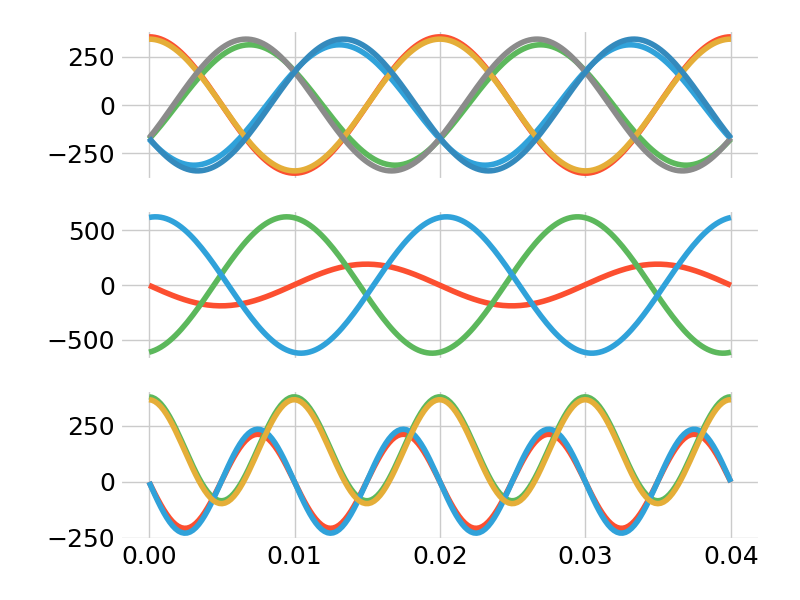

In [285]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 6), sharex = True)

axes[0].plot(t, v_abc[0,:])
axes[0].plot(t, v_abc[1,:])
axes[0].plot(t, v_abc[2,:])
axes[0].plot(t, e_abc[0,:])
axes[0].plot(t, e_abc[1,:])
axes[0].plot(t, e_abc[2,:])

axes[1].plot(t, i_abc[0,:])
axes[1].plot(t, i_abc[1,:])
axes[1].plot(t, i_abc[2,:])

axes[2].plot(t, p/1000)
axes[2].plot(t, q/1000)
axes[2].plot(t, p_e/1000)
axes[2].plot(t, q_e/1000)

In [286]:
p_cte_ref = 1.5*i_d_n*v_d_n + 1.5*i_d_p*v_d_p + 1.5*i_q_n*v_q_n + 1.5*i_q_p*v_q_p
p_cos_ref = 1.5*i_d_n*v_d_p + 1.5*i_d_p*v_d_n + 1.5*i_q_n*v_q_p + 1.5*i_q_p*v_q_n
p_sin_ref = -1.5*i_d_n*v_q_p + 1.5*i_d_p*v_q_n + 1.5*i_q_n*v_d_p - 1.5*i_q_p*v_d_n
q_cte_ref = 1.5*i_d_n*v_q_n + 1.5*i_d_p*v_q_p - 1.5*i_q_n*v_d_n - 1.5*i_q_p*v_d_p
q_cos_ref = 1.5*i_d_n*v_q_p + 1.5*i_d_p*v_q_n - 1.5*i_q_n*v_d_p - 1.5*i_q_p*v_d_n
q_sin_ref = 1.5*i_d_n*v_d_p - 1.5*i_d_p*v_d_n + 1.5*i_q_n*v_q_p - 1.5*i_q_p*v_q_n
p_cte_ref

1722.0239281630923

In [287]:
p_cos_ref

-3333.5309278310765

In [288]:
p_sin_ref

231499.49656964012

In [289]:
q_cte_ref

108197.95444046022

In [290]:
def fun(x):
    p_cte_ref = 1000.0
    q_cte_ref =  200.0
    eq_p = - p_cte_ref + 1.5*i_d_n*v_d_n + 1.5*i_d_p*v_d_p + 1.5*i_q_n*v_q_n + 1.5*i_q_p*v_q_p
    p_cos_ref = 1.5*i_d_n*v_d_p + 1.5*i_d_p*v_d_n + 1.5*i_q_n*v_q_p + 1.5*i_q_p*v_q_n
    p_sin_ref = -1.5*i_d_n*v_q_p + 1.5*i_d_p*v_q_n + 1.5*i_q_n*v_d_p - 1.5*i_q_p*v_d_n
    eq_q = - q_cte_ref + 1.5*i_d_n*v_q_n + 1.5*i_d_p*v_q_p - 1.5*i_q_n*v_d_n - 1.5*i_q_p*v_d_p
    q_cos_ref = 1.5*i_d_n*v_q_p + 1.5*i_d_p*v_q_n - 1.5*i_q_n*v_d_p - 1.5*i_q_p*v_d_n
    q_sin_ref = 1.5*i_d_n*v_d_p - 1.5*i_d_p*v_d_n + 1.5*i_q_n*v_q_p - 1.5*i_q_p*v_q_n
   
    return [eq_p,p_cos_ref,p_sin_ref,eq_q,q_cos_ref,q_sin_ref]

## Symbolic: dq steady state
<a id='dq_steady_state'></a>

In [291]:
from sympy.functions import re,im

v_d_p,v_q_p,v_d_n,v_q_n = sym.symbols('v_d_p,v_q_p,v_d_n,v_q_n',real=True)
i_d_p,i_q_p,i_d_n,i_q_n = sym.symbols('i_d_p,i_q_p,i_d_n,i_q_n',real=True)
e_d_p,e_q_p,e_d_n,e_q_n = sym.symbols('e_d_p,e_q_p,e_d_n,e_q_n',real=True)
R,L,Omega= sym.symbols('R,L,Omega',real=True)

di_d_p = 1.0/L*(e_d_p - R*i_d_p + L*Omega*i_q_p - v_d_p)
di_q_p = 1.0/L*(e_q_p - R*i_q_p - L*Omega*i_d_p - v_q_p)
di_d_n = 1.0/L*(e_d_n - R*i_d_n + L*Omega*i_q_n - v_d_n)
di_q_n = 1.0/L*(e_q_n - R*i_q_n - L*Omega*i_d_n - v_q_n)

sol = sym.solve([di_d_p,di_q_p,di_d_n,di_q_n],[i_d_p,i_q_p,i_d_n,i_q_n])

for item in [i_d_p,i_q_p,i_d_n,i_q_n]:
    print('{:s} = {:s}'.format(str(item) ,str(sym.simplify(sol[item]))))

i_d_p = (L*Omega*e_q_p - L*Omega*v_q_p + R*e_d_p - R*v_d_p)/(L**2*Omega**2 + R**2)
i_q_p = (-L*Omega*e_d_p + L*Omega*v_d_p + R*e_q_p - R*v_q_p)/(L**2*Omega**2 + R**2)
i_d_n = (L*Omega*e_q_n - L*Omega*v_q_n + R*e_d_n - R*v_d_n)/(L**2*Omega**2 + R**2)
i_q_n = (-L*Omega*e_d_n + L*Omega*v_d_n + R*e_q_n - R*v_q_n)/(L**2*Omega**2 + R**2)


## Q and P constants

In [389]:
theta = np.deg2rad(0.0)
delta = np.deg2rad(0.0)
V_z =  0.0*np.exp(1j*0.0)
V_p = 400.0/np.sqrt(3)*np.exp(1j*theta)
V_n =  10.0*np.exp(1j*0.0)

V_012 = np.array([[V_z],[V_p],[V_n]])

V_abc = A_0a @ V_012
E_abc = A_0a @ E_012

L = 400.0e-6
R = 0.01
Omega = 2*np.pi*50.0

S_1_ref = 100.0e3 +1j*50e3
V_1 = V_p
V_2 = V_n
I_1 = np.conj(S_1_ref/(3*V_1))
I_2 = 0.0
E_1 = V_1 + I_1*Z_1
E_2 = V_2 + I_2*Z_2
E_012 = np.array([0.0,E_1,E_2]).reshape(3,1)
E_abc = A_0a @ E_012

In [390]:
Z_1 = R + 1j*Omega*L
Z_0 = Z_1
Z_2 = Z_1

Z_012 = np.diag([Z_0,Z_1,Z_2])
Z_abc = A_0a @ Z_012 @ A_a0

I_abc_abc = np.linalg.solve(Z_abc,E_abc-V_abc)
I_abc_abc

array([[ 144.33756730 -72.16878365j],
       [-134.66878365 -88.91560818j],
       [  -9.66878365+161.08439182j]])

## Powers

In [391]:
I_012 = np.array([0.0,I_1,0.0]).reshape(3,1)
I_abc = A_0a @ I_012
#I_abc = I_abc_abc
V_abc.T @ np.conj(I_abc)

array([[ 100000.+50000.j]])

In [392]:
t = np.linspace(0.0,0.04,200)

e_abc = np.real(E_abc*np.exp(1j*Omega*t))*np.sqrt(2)
v_abc = np.real(V_abc*np.exp(1j*Omega*t))*np.sqrt(2)
i_abc = np.real(I_abc*np.exp(1j*Omega*t))*np.sqrt(2)

p = np.sum(v_abc*i_abc,axis=0)
#q = -((v_abc[1]- v_abc[2]) * i_abc[0] + (v_abc[2]- v_abc[0]) * i_abc[1]  + (v_abc[0]- v_abc[1]) * i_abc[2] )/np.sqrt(3)
q = -((v_abc[2]- v_abc[1]) * i_abc[0] + (v_abc[0]- v_abc[2]) * i_abc[1]  + (v_abc[1]- v_abc[0]) * i_abc[2] )/np.sqrt(3)

p_e = np.sum(e_abc*i_abc,axis=0)
#q = -((v_abc[1]- v_abc[2]) * i_abc[0] + (v_abc[2]- v_abc[0]) * i_abc[1]  + (v_abc[0]- v_abc[1]) * i_abc[2] )/np.sqrt(3)
q_e = -((e_abc[2]- e_abc[1]) * i_abc[0] + (e_abc[0]- e_abc[2]) * i_abc[1]  + (e_abc[1]- e_abc[0]) * i_abc[2] )/np.sqrt(3)


#q = (i_a*(v_c-v_b) + i_b*(v_a-v_c) + i_c*(v_b-v_a))/np.sqrt(3)
P = np.average(p)
Q = np.average(q)

print('S = ',P+1j*Q)

S =  (100021.650635+50010.8253175j)


<IPython.core.display.Javascript object>


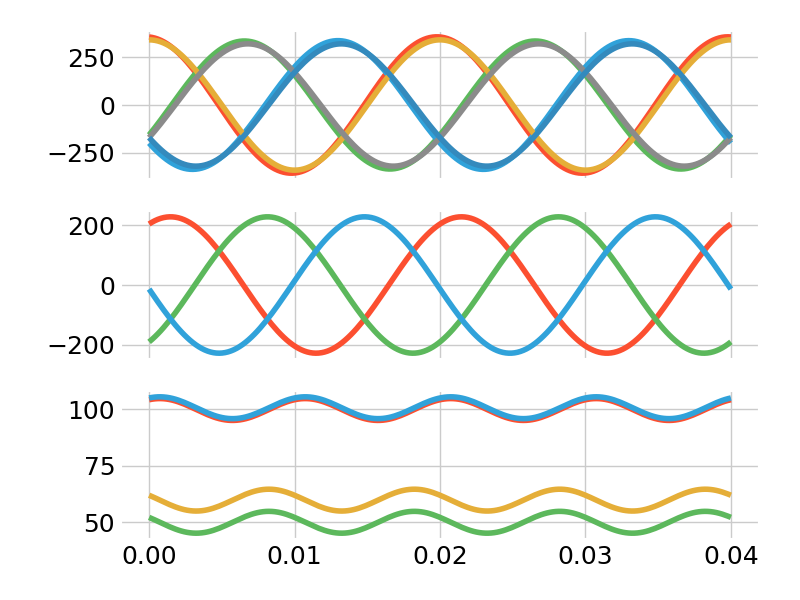

In [393]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 6), sharex = True)

axes[0].plot(t, e_abc[0,:])
axes[0].plot(t, e_abc[1,:])
axes[0].plot(t, e_abc[2,:])
axes[0].plot(t, v_abc[0,:])
axes[0].plot(t, v_abc[1,:])
axes[0].plot(t, v_abc[2,:])

axes[1].plot(t, i_abc[0,:])
axes[1].plot(t, i_abc[1,:])
axes[1].plot(t, i_abc[2,:])

axes[2].plot(t, p/1000)
axes[2].plot(t, q/1000)
axes[2].plot(t, p_e/1000)
axes[2].plot(t, q_e/1000)

In [388]:
A_a0@I_abc_abc

array([[ -3.55271368e-14 +1.42108547e-14j],
       [  1.43520118e+02 +1.02723663e+01j],
       [  3.55271368e-14 +1.42108547e-14j]])

In [361]:
V_abc.T @ I_abc.conj()

array([[100000. -2.53840976e-12j]])

In [319]:
I_012

array([[   0.0000000+0.j],
       [ 144.3375673-0.j],
       [   0.0000000+0.j]])